# Example Application

This example application is from a shaking table test at the University of Bristol EQUALS laboratory.

The test involves the free-field response of 70cm of SoFSI sand, tested in the small shear stack.

## Import data

### Libraries

In [1]:
import sys
sys.path.append('../src')
import pydysp
import matplotlib.pyplot as plt

### Information

In [2]:
# Test Information
directory = "example_1_data"
filenames = [
    "./"+directory+"/LE2402_T1.mat",
    "./"+directory+"/LE2402_T2.mat",
    "./"+directory+"/LE2402_T4.mat",
]
test_descriptions = [
    "1-50Hz Noise, 0.06g",
    "1-50Hz Noise, 0.20g",
    "1-50Hz Noise, 0.50g",
]

In [3]:
# Channel information
channel_names = [
    "Acc1-R1",
    "Acc2-R1vert",
    "Acc3-R3",
    "Acc4-R5",
    "Acc5-R7",
    "Pot-R3",
    "Pot-R5",
    "Pot-R7",
    "Acc6-S1",
    "Acc7-S3",
    "Acc8-S3s",
    "Acc9-S5",
    "Acc10-S5s",
    "Acc11-S7",
    "Acc11-S5s",
]
channel_descriptions = [
    "Stack Ring 1Y",
    "Stack Ring 1Z",
    "Stack Ring 3Y",
    "Stack Ring 5Y",
    "Stack Ring 7Y",
    "Stack Ring 3Y",
    "Stack Ring 5Y",
    "Stack Ring 7Y",
    "Sand (510,0)",
    "Sand (510,242)",
    "Sand (300,242)",
    "Sand (510,462)",
    "Sand (300,462)",
    "Sand (510,682)",
    "Sand (300,682)",
]
units = [
    "g","g","g","g","g",
    "mm","mm","mm",
    "g","g","g","g","g","g","g"
]
calibrations = [
    1,1,1,1,1,
    0.039359,0.038985,0.038477,
    3.110,3.120,3.135,2.905,3.008,3.332,2.908
] #V/unit

### Data Import

In [4]:
# Create tests
test = [pydysp.test.Test() for _ in enumerate(filenames)]
for i,i_test in enumerate(test):
    i_test.read_equals(filename=filenames[i])
    i_test.set_test_info(description=test_descriptions[i])
    i_test.set_channel_info(names=channel_names, descriptions=channel_descriptions, units=units, calibrations=calibrations)
    i_test.baseline_correct()
    i_test.filter()
    i_test.trim()

## Printing and plotting

In [5]:
# Typical test information
info_test = test[0].get_test_info()

Name: Project reference: LE2401
Description: 1-50Hz Noise, 0.06g
Filename: D:\EERC\Students\EllaLee\LE2402\LE2402_T1.m
Time: Fri 23/Feb/202409:40:14
Number of Channels: 15
Channel Names:
  0: Acc1-R1 , Stack Ring 1Y
  1: Acc2-R1vert , Stack Ring 1Z
  2: Acc3-R3 , Stack Ring 3Y
  3: Acc4-R5 , Stack Ring 5Y
  4: Acc5-R7 , Stack Ring 7Y
  5: Pot-R3 , Stack Ring 3Y
  6: Pot-R5 , Stack Ring 5Y
  7: Pot-R7 , Stack Ring 7Y
  8: Acc6-S1 , Sand (510,0)
  9: Acc7-S3 , Sand (510,242)
  10: Acc8-S3s , Sand (300,242)
  11: Acc9-S5 , Sand (510,462)
  12: Acc10-S5s , Sand (300,462)
  13: Acc11-S7 , Sand (510,682)
  14: Acc11-S5s , Sand (300,682)


In [6]:
# Typical channel information
info_channel = test[0].channel[8].get_channel_info()

Name: Acc6-S1
Description: Sand (510,0)
Unit: g
Calibration: 3.11
Timestep: 0.001952
Points: 30505


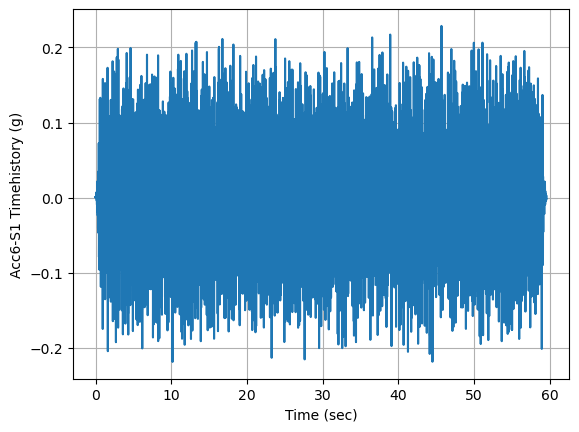

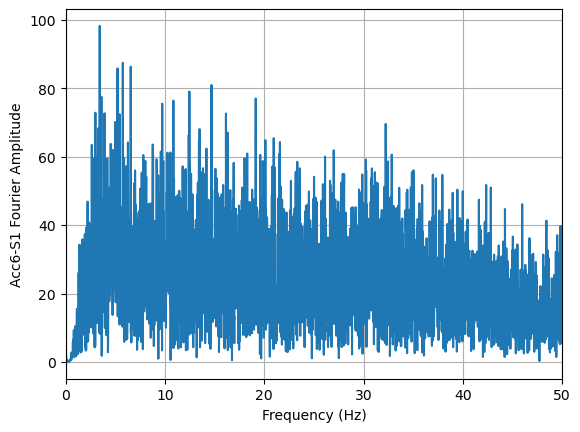

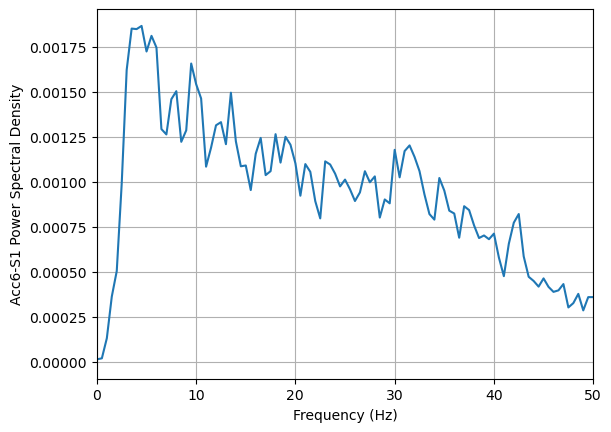

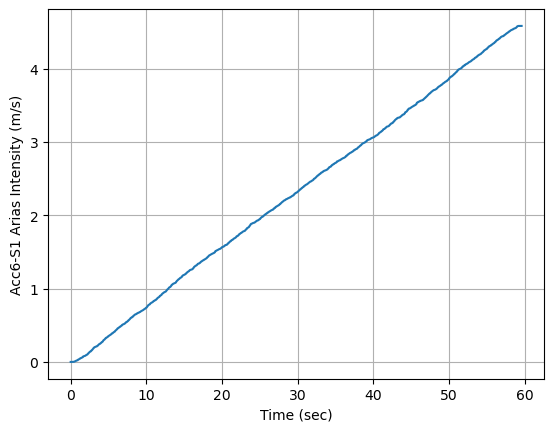

In [7]:
# Typical channel plots
ax = test[1].channel[8].plot(plot_type="Timehistory")
ax = test[1].channel[8].plot(plot_type="Fourier")
ax = test[1].channel[8].plot(plot_type="Power", nperseg=1024)
ax = test[1].channel[8].plot(plot_type="Arias")

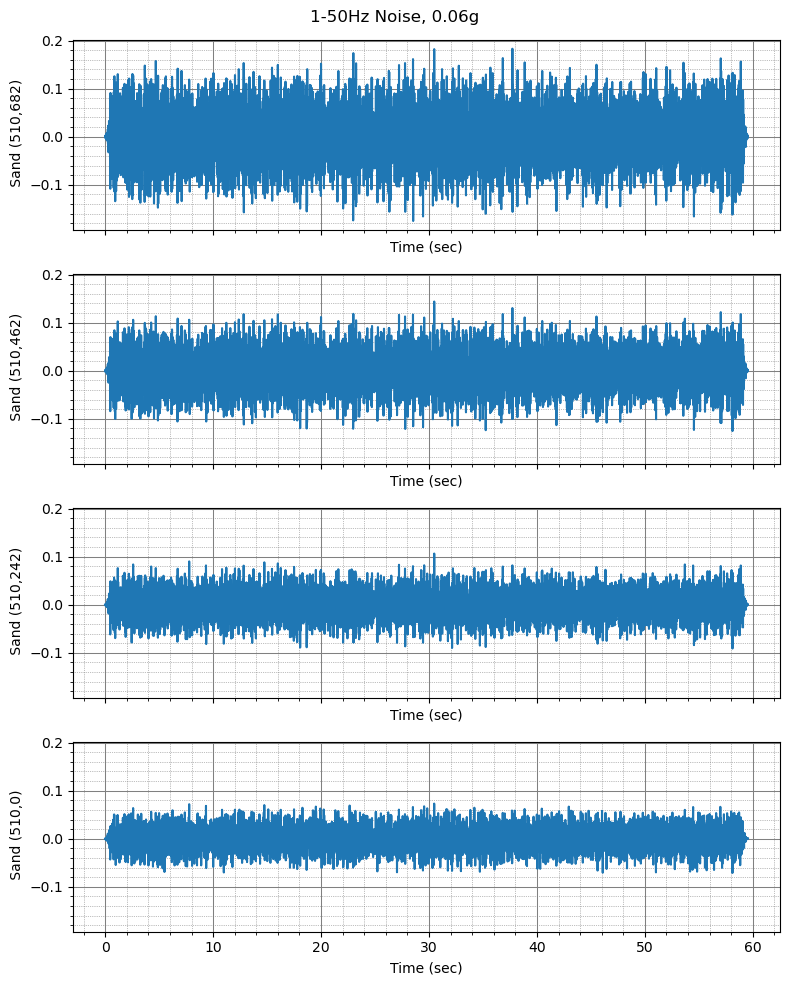

In [8]:
# Typical test plots
ax = test[0].plot(channels=[13,11,9,8], columns=1, plot_type="Timehistory") #same inputs as above
# Plot formatting
ax[0].figure.set_size_inches(8,10)
ax[0].minorticks_on()
for a in ax:
    a.grid(which='major', linestyle='-', linewidth=0.75, color='gray')
    a.grid(which='minor', linestyle=':', linewidth=0.5, color='gray')

In [9]:
# Collecting information from multiple tests
for t in test:
    th=t.channel[8].timehistory()[1]
    print(f"{t.description}: t_max = {th[0]:.3f}, a_max = {th[1]:.3f}")

1-50Hz Noise, 0.06g: t_max = 30.482, a_max = 0.073
1-50Hz Noise, 0.20g: t_max = 45.700, a_max = 0.229
1-50Hz Noise, 0.50g: t_max = 30.192, a_max = 0.548


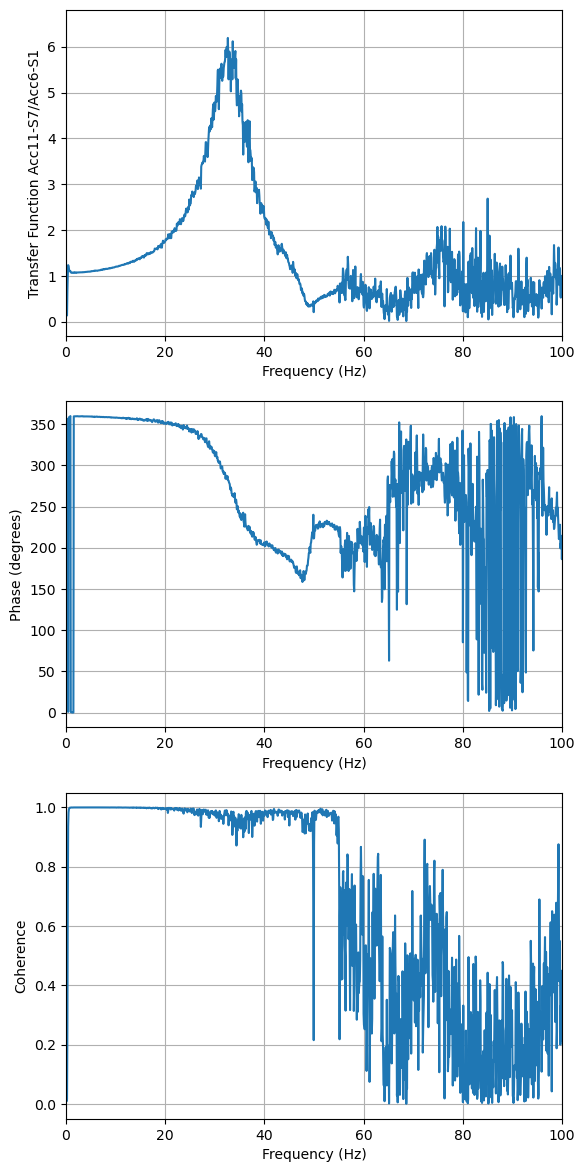

In [10]:
# Plotting a single transfer function
[_,[f,t,_,_,_,_],_,_] = test[0].transfer_function(channel_from=8, channel_to=13, xlim=100)

1-50Hz Noise, 0.06g: fn = 33.02, ksi = 0.116
1-50Hz Noise, 0.20g: fn = 27.02, ksi = 0.213
1-50Hz Noise, 0.50g: fn = 17.01, ksi = 0.525


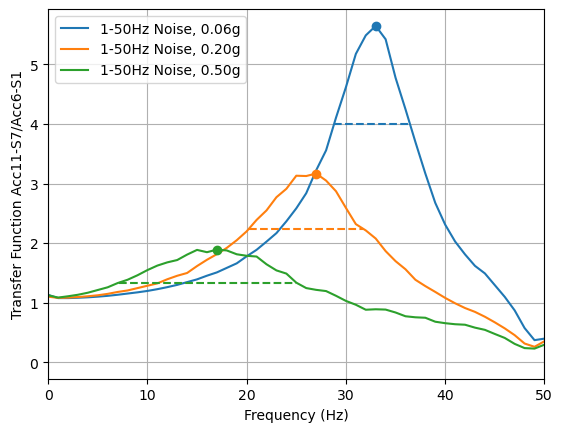

In [11]:
# Plotting multiple transfer functions
fix1,ax1 = plt.subplots()
for t in test:
    tf=t.transfer_function(channel_from=8, channel_to=13, axis=ax1, find_peak=True, find_damping=True, nperseg=512)
    # Printing information from multiple tests
    print(f"{t.description}: fn = {tf[2][0]:.2f}, ksi = {tf[3]:.3f}")
leg=ax1.legend()

In [12]:
# Export data
for t in test:
    #t.export_to_csv(filename = t.filename.split("\\")[-1].split(".")[0]+".csv")
    pass

## Further work

### Vibration Toolbox
Experimental Modal Analysis (EMA) using the [Engineering Vibration Toolbox](https://vibrationtoolbox.github.io/) (VTB).

In [13]:
import numpy as np
import vibration_toolbox as vtb

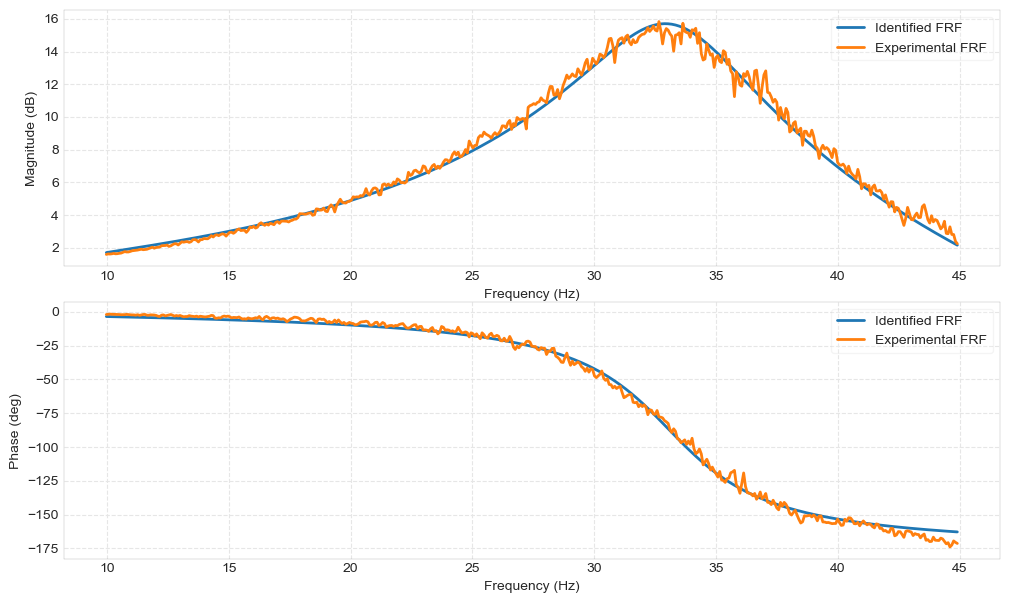

(0.09275081159816441, 33.204716536004575, 1.1265614099274528)

In [14]:
[_,[f,tf,_,_,_,_],_,_]=test[0].transfer_function(channel_from=8, channel_to=13, axis=[])
# f and tf must be converted to vectors
F = np.array([f]).T
TF = np.array([tf]).T
# fmin and fmax must be given as integers
dF = f[1]-f[0]
fmin = int(10/dF)
fmax = int(45/dF)
# vtb.ema
vtb.ema.sdof_cf(F,TF,fmin,fmax)
# Returns: damping, natural frequency, numerator of identified transfer functions

### SDyPy-EMA
Experimental Modal Analysis using [SDyPy-EMA](https://github.com/sdypy/sdypy-EMA).

In [15]:
from sdypy import EMA

In [16]:
[_,[f,tf,_,_,_,_],_,_]=test[0].transfer_function(channel_from=8, channel_to=13, axis=[])
# Create model
ema_model = EMA.Model(
    tf,
    f,
    lower=10,
    upper=45,
    pol_order_high=50
    )
# Analyse
ema_model.get_poles()
ema_model.select_poles()
ema_model.print_modal_data()
H,A = ema_model.get_constants(method='lsfd')

100%|██████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 252.30it/s]


   Nat. f.      Damping
-----------------------
1)   32.5	0.1039


<Figure size 1000x600 with 0 Axes>

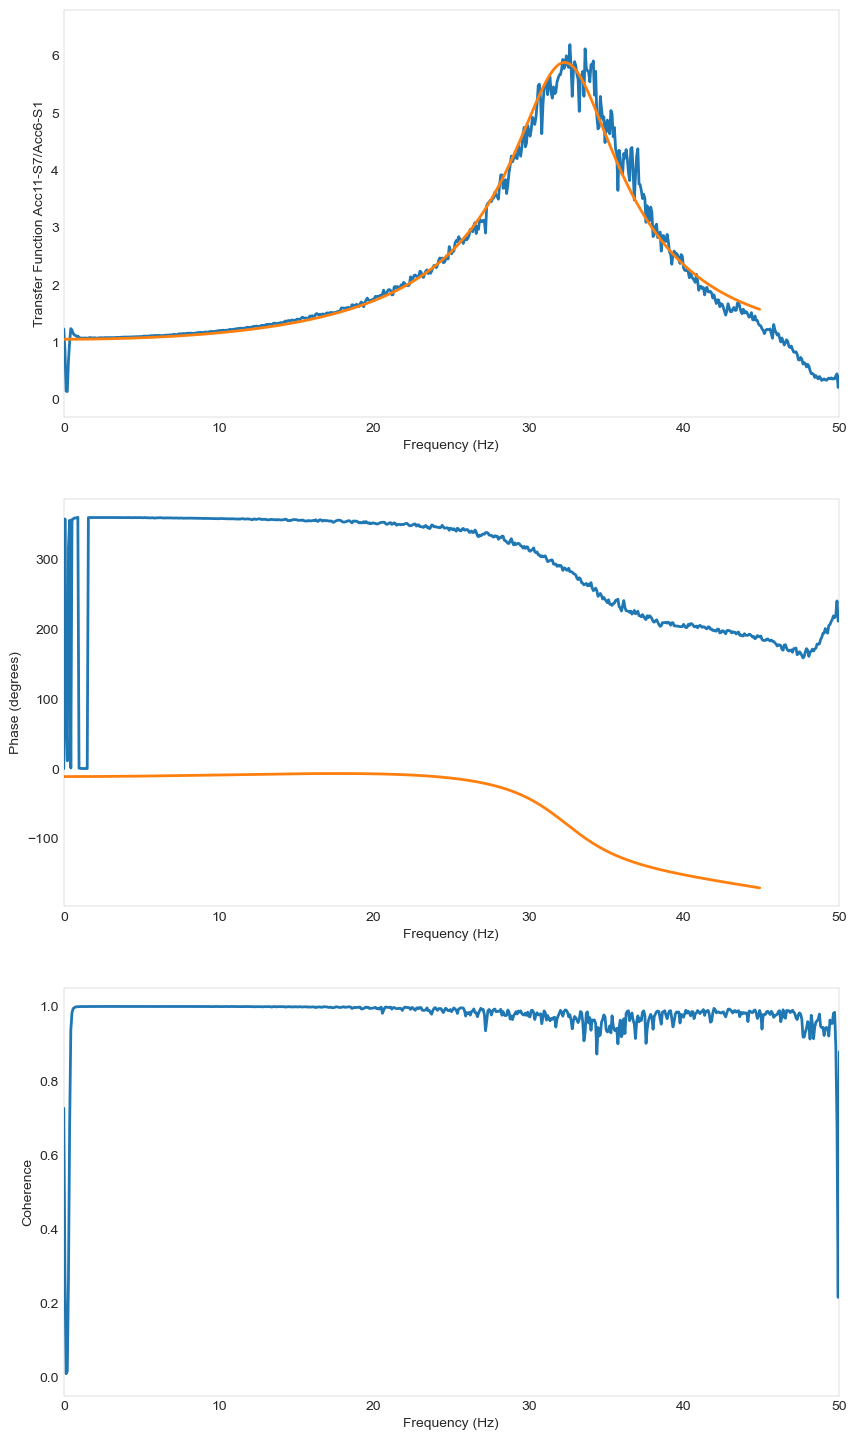

In [17]:
[axes,_,_,_]=test[0].transfer_function(channel_from=8, channel_to=13)
axes[0].plot(ema_model.freq, np.abs(H[0]))
axes[1].plot(ema_model.freq, np.angle(H[0])*180/np.pi)

### pyStrata
Site response analysis using [pyStrata](https://github.com/arkottke/pystrata).

In [18]:
import numpy as np
import pystrata

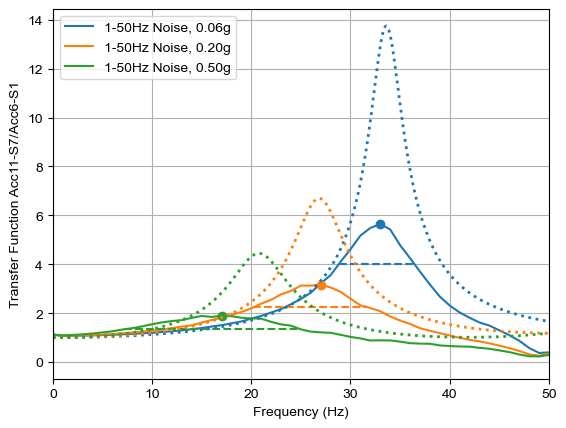

In [19]:
# Prepare Analysis
ax1_ = ax1
Vs0 = 135
outputs = []
for i,t in enumerate(test):
    # Run PyStrata
    soiltype_sand = pystrata.site.SoilType.from_published("Sand", 16.5, "Vucetic & Dobry (91), PI=0", "Vucetic & Dobry (91), PI=0")
    soiltype_rock = pystrata.site.SoilType("Bedrock", 20.0, None, 0.01)
    layers = [ pystrata.site.Layer(soiltype_sand, 0.1, Vs0*z**0.25) for z in np.arange(0.05,0.7,0.1) ]
    layers.append( pystrata.site.Layer(soiltype_rock, 0, 2000) )
    profile = pystrata.site.Profile(layers)
    input_motion = pystrata.motion.TimeSeriesMotion(t.filename, t.description, t.channel[0]._timestep, t.channel[0].timehistory()[0][1])
    freqs = np.arange(0, 50, 0.1)
    outputs.append(pystrata.output.OutputCollection([
        pystrata.output.AccelTransferFunctionOutput( freqs,
            pystrata.output.OutputLocation("within", index=-1),
            pystrata.output.OutputLocation("outcrop", index=0),
        ),
    ]))
    calculator = pystrata.propagation.EquivalentLinearCalculator()
    calculator(input_motion, profile, profile.location("within", index=-1))
    outputs[i](calculator)
    # Plot Output
    col = ax1.get_lines()[3*i].get_color()
    ax1_.plot(freqs,outputs[i][0].values,color=col,linestyle="dotted")
ax1_.get_figure()